In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pickle

time_result_path = r"result_x_Q_cuts/compare_time_result/num-50_params-params_5000_False_15_(512, 512)_sce-False_x-True_gamma-0.5.pkl"
obj_result_path = r"result_x_Q_cuts/compare_obj_result/num-50_params-params_5000_False_15_(512, 512)_sce-False_x-True_gamma-0.5.pkl"
with open(time_result_path, 'rb') as f:
    time_result = pickle.load(f)
with open(obj_result_path, 'rb') as f:
    obj_result = pickle.load(f)
print(time_result.keys())
print(obj_result.keys())


dict_keys(['pred_sddip_time', 'sddip_time', 'pred_sddip_obj', 'sddip_obj', 'pred_sddip_time_re', 'sddip_time_re', 'pred_sddip_obj_re', 'sddip_obj_re'])
dict_keys(['obj_test', 'obj_pred', 'obj_nocut', 'obj_test_re', 'obj_pred_re', 'obj_nocut_re'])


In [14]:
obj_test = obj_result['obj_test']
obj_pred = obj_result['obj_pred']
obj_nocut = obj_result['obj_nocut']
obj_test_re = obj_result['obj_test_re']
obj_pred_re = obj_result['obj_pred_re']
obj_nocut_re = obj_result['obj_nocut_re']
pred_sddip_time = time_result['pred_sddip_time']
sddip_time = time_result['sddip_time']
pred_sddip_obj = time_result['pred_sddip_obj']
sddip_obj = time_result['sddip_obj']
pred_sddip_time_re = time_result['pred_sddip_time_re']
sddip_time_re = time_result['sddip_time_re']
pred_sddip_obj_re = time_result['pred_sddip_obj_re']
sddip_obj_re = time_result['sddip_obj_re']


In [15]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


obj对比 执行sddip的前向过程计算obj
obj_test: 使用test数据集label的15个cut
obj_pred: 使用预测的15个cut
obj_nocut: 没有cut



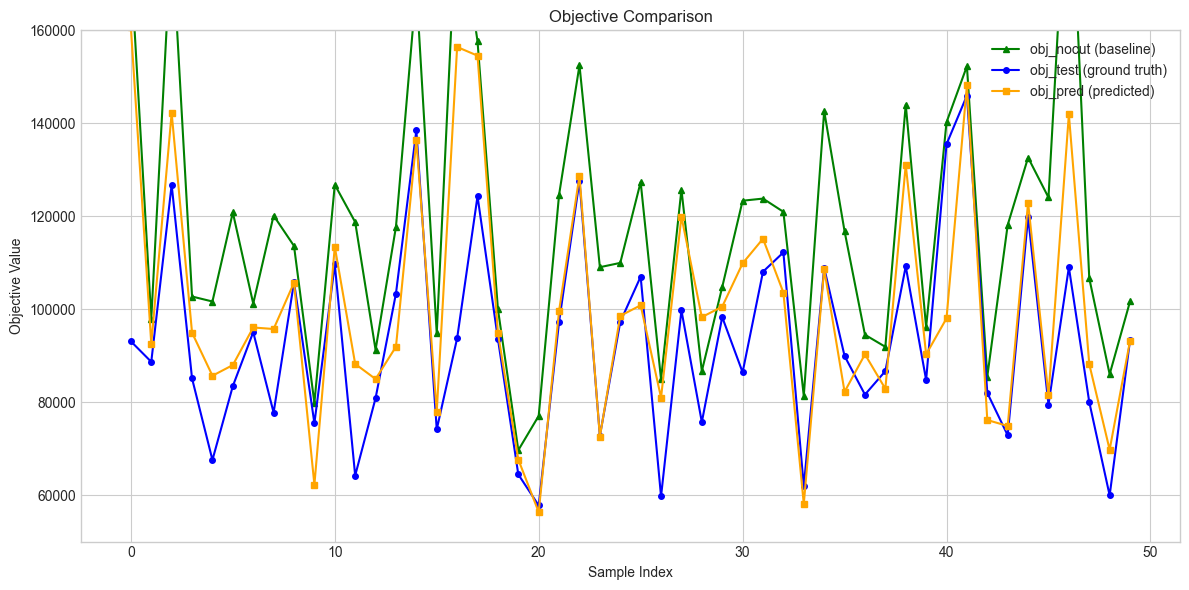

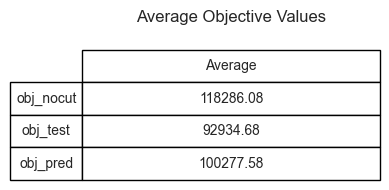

In [16]:
print(
    "obj对比 执行sddip的前向过程计算obj\n"
    "obj_test: 使用test数据集label的15个cut\n"
    "obj_pred: 使用预测的15个cut\n"
    "obj_nocut: 没有cut\n"
)
x = list(range(len(obj_test)))
plt.style.use('seaborn-v0_8-whitegrid')

# ===== 第一个图：折线图 =====
plt.figure(figsize=(12, 6))
plt.plot(x, obj_nocut, label='obj_nocut (baseline)', color="green", linestyle='-', marker='^', markersize=4)
plt.plot(x, obj_test, label='obj_test (ground truth)', color="blue", linestyle='-', marker='o', markersize=4)
plt.plot(x, obj_pred, label='obj_pred (predicted)', color="orange", linestyle='-', marker='s', markersize=4)
# plt.plot(x, obj_pred_re, label='obj_pred_re (recalculated)', color="red", linestyle='-', marker='d', markersize=4)

plt.ylim(50000, 160000)

plt.xlabel('Sample Index')
plt.ylabel('Objective Value')
plt.title('Objective Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 第二个图：平均值表格 =====
avg_values = [
    np.mean(obj_nocut),
    np.mean(obj_test),
    np.mean(obj_pred)
]
rows = ['obj_nocut', 'obj_test', 'obj_pred']
cell_text = [[f"{v:.2f}"] for v in avg_values]

plt.figure(figsize=(4, 2))
the_table = plt.table(
    cellText=cell_text,
    rowLabels=rows,
    colLabels=["Average"],
    cellLoc='center',
    rowLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

plt.axis('off')  # 不显示坐标轴
plt.title("Average Objective Values", pad=20)
plt.tight_layout()
plt.show()

obj对比 执行sddip的前向过程计算obj
obj_test: 使用test数据集label的15个cut
obj_pred: 使用预测的15个cut
obj_nocut: 没有cut
obj_pred_re: 使用预测的15个cut更新截距



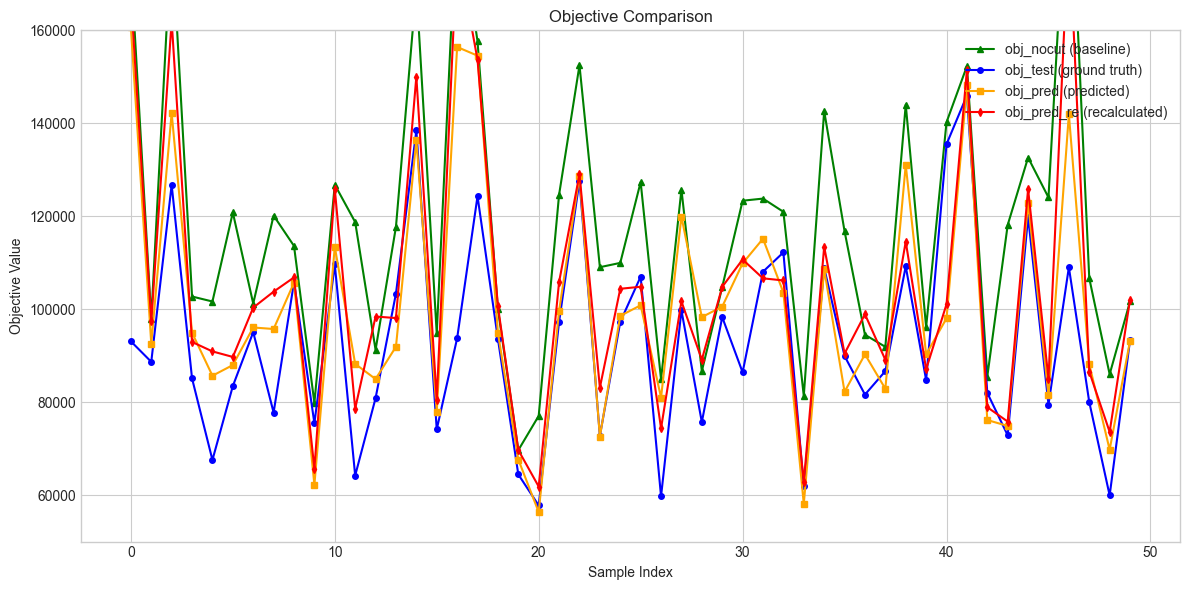

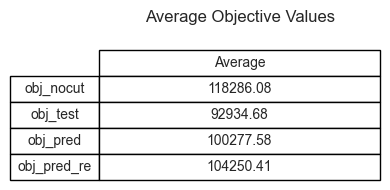

In [17]:
print(
    "obj对比 执行sddip的前向过程计算obj\n"
    "obj_test: 使用test数据集label的15个cut\n"
    "obj_pred: 使用预测的15个cut\n"
    "obj_nocut: 没有cut\n"
    "obj_pred_re: 使用预测的15个cut更新截距\n"
)

x = list(range(len(obj_test)))
plt.style.use('seaborn-v0_8-whitegrid')

# ===== 第一个图：折线图 =====
plt.figure(figsize=(12, 6))
plt.plot(x, obj_nocut, label='obj_nocut (baseline)', color="green", linestyle='-', marker='^', markersize=4)
plt.plot(x, obj_test, label='obj_test (ground truth)', color="blue", linestyle='-', marker='o', markersize=4)
plt.plot(x, obj_pred, label='obj_pred (predicted)', color="orange", linestyle='-', marker='s', markersize=4)
plt.plot(x, obj_pred_re, label='obj_pred_re (recalculated)', color="red", linestyle='-', marker='d', markersize=4)

plt.ylim(50000, 160000)

plt.xlabel('Sample Index')
plt.ylabel('Objective Value')
plt.title('Objective Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 第二个图：平均值表格 =====
avg_values = [
    np.mean(obj_nocut),
    np.mean(obj_test),
    np.mean(obj_pred),
    np.mean(obj_pred_re)
]
rows = ['obj_nocut', 'obj_test', 'obj_pred', 'obj_pred_re']
cell_text = [[f"{v:.2f}"] for v in avg_values]

plt.figure(figsize=(4, 2))
the_table = plt.table(
    cellText=cell_text,
    rowLabels=rows,
    colLabels=["Average"],
    cellLoc='center',
    rowLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

plt.axis('off')  # 不显示坐标轴
plt.title("Average Objective Values", pad=20)
plt.tight_layout()
plt.show()

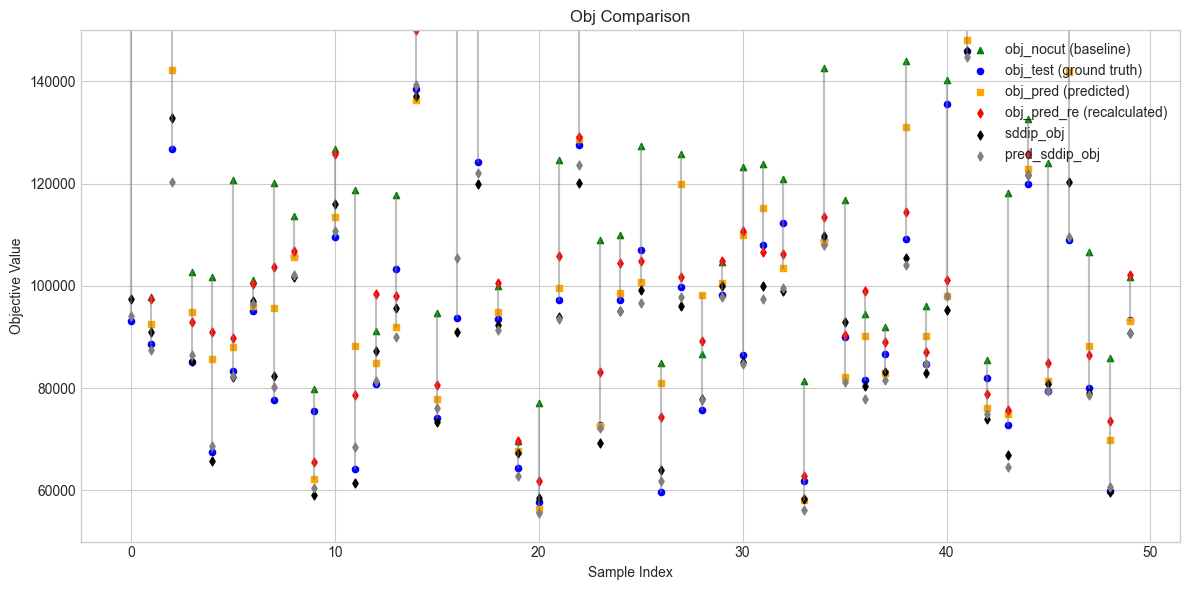

In [18]:
import matplotlib.pyplot as plt

x = list(range(len(obj_test)))

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# 每个样本 index 上画一条竖线，连接所有 y 值
for i in range(len(x)):
    y_vals = [obj_test[i], obj_pred[i], obj_nocut[i], obj_pred_re[i]]
    plt.plot([x[i]] * len(y_vals), y_vals, color='gray', alpha=0.5)  # 垂直线

# 叠加各曲线上的散点（作为图例）
plt.scatter(x, obj_nocut, color="green", label='obj_nocut (baseline)', marker='^', s=20)
plt.scatter(x, obj_test, color="blue", label='obj_test (ground truth)', marker='o', s=20)
plt.scatter(x, obj_pred, color="orange", label='obj_pred (predicted)', marker='s', s=20)
plt.scatter(x, obj_pred_re, color="red", label='obj_pred_re (recalculated)', marker='d', s=20)

# 继续sddip收敛的obj
plt.scatter(x, sddip_obj, color="black", label='sddip_obj ', marker='d', s=20)
plt.scatter(x, pred_sddip_obj, color="grey", label='pred_sddip_obj ', marker='d', s=20)


plt.ylim(50000, 150000)
plt.xlabel('Sample Index')
plt.ylabel('Objective Value')
plt.title('Obj Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


# 计算error ratio
abs(obj_candidate - obj_optimal) / obj_optimal

abs(obj_pred - obj_test) / obj_test

In [19]:
import math
def error_ratio_calculate(obj_candidate, obj_optimal):
    error_ratio = [abs(obj_candidate[i] - obj_optimal[i]) / obj_optimal[i] for i in range(len(obj_candidate))]
    # 计算均值和方差
    average_ratio = sum(error_ratio) / len(error_ratio)
    std_ratio = math.sqrt(sum([(r - average_ratio) ** 2 for r in error_ratio]) / len(error_ratio))
    return average_ratio, std_ratio

In [20]:
average_ratio, std_ratio = error_ratio_calculate(obj_pred, obj_test)
print("mean_ratio", average_ratio)
print("std_ratio", std_ratio)

average_ratio_re, std_ratio_re = error_ratio_calculate(obj_pred_re, obj_test_re)
print("mean_ratio", average_ratio_re)
print("std_ratio", std_ratio_re)


print(f"{'Method':<20} {'Mean Relative Error (%)':>25} {'Std (%)':>15}")
print(f"{'-'*60}")
print(f"{'pred':<20} {average_ratio * 100:>25.2f} ± {std_ratio * 100:>6.2f}")
print(f"{'pred-re':<20} {average_ratio_re * 100:>25.2f} ± {std_ratio_re * 100:>6.2f}")


mean_ratio 0.12721266526051966
std_ratio 0.15502923204362581
mean_ratio 0.14690703032080338
std_ratio 0.18744472375308693
Method                 Mean Relative Error (%)         Std (%)
------------------------------------------------------------
pred                                     12.72 ±  15.50
pred-re                                  14.69 ±  18.74


# time compare

time对比 
sddip: sddip收敛时间
pred: 使用预测的15个cut继续sddip的收敛时间
pred_re: 使用重算截距预测的15个cut继续sddip的收敛时间



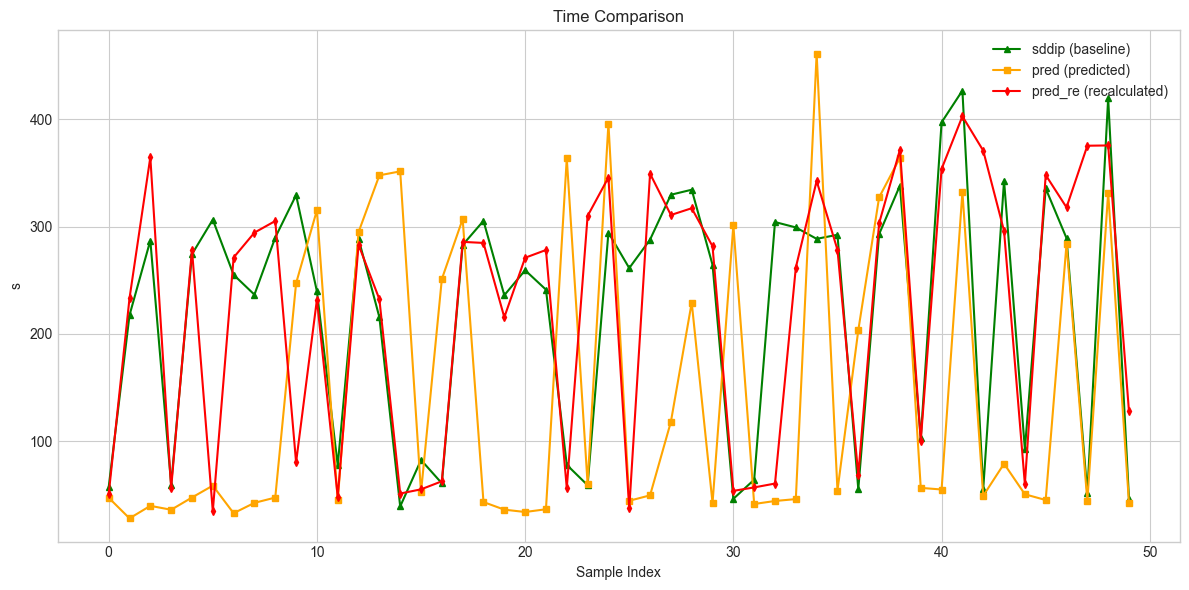

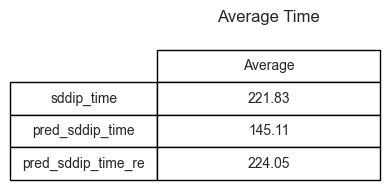

In [21]:
print(
    "time对比 \n"
    "sddip: sddip收敛时间\n"
    "pred: 使用预测的15个cut继续sddip的收敛时间\n"
    "pred_re: 使用重算截距预测的15个cut继续sddip的收敛时间\n"
)
x = list(range(len(sddip_time)))
plt.style.use('seaborn-v0_8-whitegrid')

# ===== 第一个图：折线图 =====
plt.figure(figsize=(12, 6))
plt.plot(x, sddip_time, label='sddip (baseline)', color="green", linestyle='-', marker='^', markersize=4)
plt.plot(x, pred_sddip_time, label='pred (predicted)', color="orange", linestyle='-', marker='s', markersize=4)
plt.plot(x, pred_sddip_time_re, label='pred_re (recalculated)', color="red", linestyle='-', marker='d', markersize=4)


plt.xlabel('Sample Index')
plt.ylabel('s')
plt.title('Time Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 第二个图：平均值表格 =====
avg_values = [
    np.mean(sddip_time),
    np.mean(pred_sddip_time),
    np.mean(pred_sddip_time_re)
]
rows = ['sddip_time', 'pred_sddip_time', 'pred_sddip_time_re']
cell_text = [[f"{v:.2f}"] for v in avg_values]

plt.figure(figsize=(4, 2))
the_table = plt.table(
    cellText=cell_text,
    rowLabels=rows,
    colLabels=["Average"],
    cellLoc='center',
    rowLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

plt.axis('off')  # 不显示坐标轴
plt.title("Average Time", pad=20)
plt.tight_layout()
plt.show()

obj对比 执行sddip的前向过程计算obj
obj_test: 使用test数据集label的15个cut
obj_pred: 使用预测的15个cut
obj_nocut: 没有cut



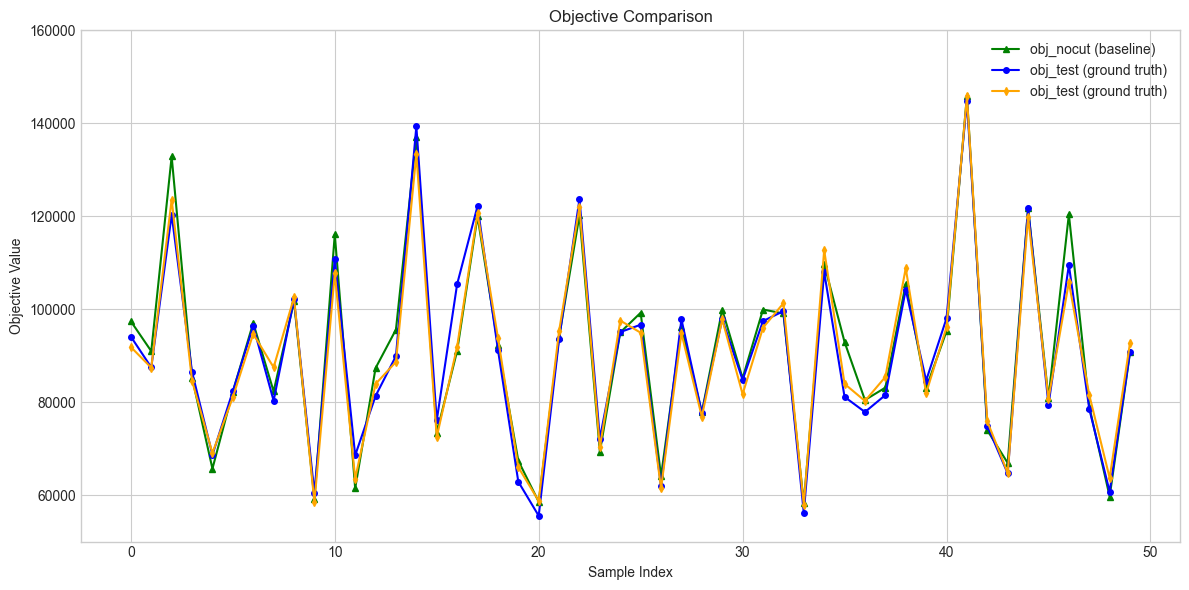

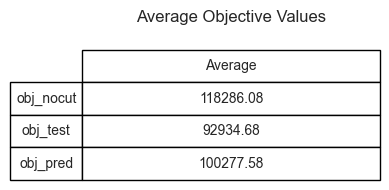

In [22]:
print(
    "obj对比 执行sddip的前向过程计算obj\n"
    "obj_test: 使用test数据集label的15个cut\n"
    "obj_pred: 使用预测的15个cut\n"
    "obj_nocut: 没有cut\n"
)
x = list(range(len(obj_test)))
plt.style.use('seaborn-v0_8-whitegrid')

# ===== 第一个图：折线图 =====
plt.figure(figsize=(12, 6))
plt.plot(x, sddip_obj, label='obj_nocut (baseline)', color="green", linestyle='-', marker='^', markersize=4)
plt.plot(x, pred_sddip_obj, label='obj_test (ground truth)', color="blue", linestyle='-', marker='o', markersize=4)
plt.plot(x, pred_sddip_obj_re, label='obj_test (ground truth)', color="orange", linestyle='-', marker='d', markersize=4)

plt.ylim(50000, 160000)

plt.xlabel('Sample Index')
plt.ylabel('Objective Value')
plt.title('Objective Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 第二个图：平均值表格 =====
avg_values = [
    np.mean(obj_nocut),
    np.mean(obj_test),
    np.mean(obj_pred)
]
rows = ['obj_nocut', 'obj_test', 'obj_pred']
cell_text = [[f"{v:.2f}"] for v in avg_values]

plt.figure(figsize=(4, 2))
the_table = plt.table(
    cellText=cell_text,
    rowLabels=rows,
    colLabels=["Average"],
    cellLoc='center',
    rowLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

plt.axis('off')  # 不显示坐标轴
plt.title("Average Objective Values", pad=20)
plt.tight_layout()
plt.show()

# 比较不同gamma model对应的error_ratio

In [17]:
import pandas as pd
gamma_list = [0.0001, 0.001, 0.1, 0.5, 0.9, 1, 1.2, 1.6, 2, 10, 100, 1000]

model_error_ratio_res = {
        "gamma": [],
        "average": [],
        "std": [],
        "average_re": [],
        "std_re": [],
    }

for gamma in gamma_list:
    gamma_result_path = f"./result_x_Q_cuts/compare_obj_result/gamma-{gamma}_params-params_5000_False_15_(512, 512)_sce-False_x-True_gamma-1.pth.pkl"
    with open(gamma_result_path, 'rb') as f:
        gamma_result = pickle.load(f)
        average, std = error_ratio_calculate(gamma_result["obj_pred"], gamma_result["obj_test"])
        average_re, std_re = error_ratio_calculate(gamma_result["obj_pred_re"], gamma_result["obj_test"])
        model_error_ratio_res["gamma"].append(gamma)
        model_error_ratio_res["average"].append(average)
        model_error_ratio_res["average_re"].append(average_re)
        model_error_ratio_res["std"].append(std)
        model_error_ratio_res["std_re"].append(std_re)
error_df = pd.DataFrame(model_error_ratio_res)
error_df


,gamma,average,std,average_re,std_re
0,0.0001,0.075206,0.080475,0.106367,0.095040
1,0.0010,0.076261,0.079512,0.096601,0.092086
2,0.1000,0.074849,0.094077,0.083821,0.065560
3,0.5000,0.067444,0.079247,0.095446,0.089238
4,0.9000,0.073685,0.082290,0.090271,0.089231
5,1.0000,0.078007,0.085742,0.107196,0.092130
6,1.2000,0.079783,0.089629,0.104041,0.086405
7,1.6000,0.072018,0.078145,0.080420,0.087182
8,2.0000,0.077385,0.090105,0.093722,0.089651
9,10.0000,0.080270,0.091434,0.094601,0.086632
